<a href="https://colab.research.google.com/github/rajabhupati/AI-Session/blob/main/Prompt_Tuning_%26_Hallucinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hallucination
This notebook demonstrates the power of prompt design using an open-source LLM



*   TinyLlama/TinyLlama-1.1B-Chat-v1.0
*   mistralai/Mistral-7B-Instruct-v0.1


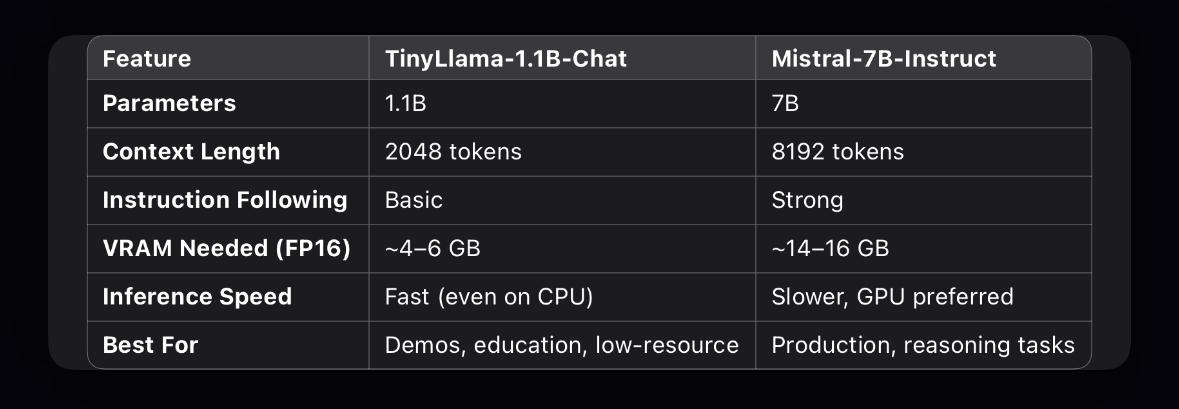

In [ ]:
# Install required libraries
!pip install transformers accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
# Load TinyLlama model and tokenizer
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from google.colab import userdata

# Directly set the Hugging Face token in your code (not ideal for real use due to exposure)
huggingface_token = userdata.get('HUGGINGFACE_TOKEN')


# Ensure token is accessible
if not huggingface_token:
    raise ValueError("HUGGINGFACE_TOKEN is not set. Please ensure it's configured correctly.")

model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_id,token=huggingface_token)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",
    load_in_4bit=True,
    do_sample=True,
    token=huggingface_token,
    temperature=0.5,
    top_k=50,
    top_p=0.9
)


The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


In [ ]:
def gradual_explanation(generate):
    prompts = [
        # Vague Context
        ("General awareness", "Explain generative AI briefly."),

        # Adding Role
        ("AI enthusiast", "As an AI enthusiast, describe how generative AI differs from traditional AI."),

        # Adding Specific Action
        ("Software developer", "As a software developer, discuss how generative AI might be used to innovate products."),

        # Further Specific Action
        ("Educator", "As an educator, explain generative AI with examples that would be clear to high school students."),

        # Highly Specific Context, Role, and Action
        ("Industry strategist", "As an industry strategist, detail how generative AI could transform the healthcare sector in the next 5 years.")
    ]

    for context, prompt in prompts:
        print(f"Context: {context}")
        print(generate(prompt))
        print("\n")

# Define the generate function to produce output for each prompt
def generate(prompt, max_tokens=200):
    # Sample logic for integration with a language model
    # Replace this part with actual model inference code
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    outputs = model.generate(**inputs, max_new_tokens=max_tokens, do_sample=True, temperature=0.7)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)


gradual_explanation(generate)

Context: General awareness
Explain generative AI briefly. Generative Adversarial Networks (GANs) are a type of unsupervised generative model that can generate new data from a source distribution. The model consists of two networks, the generator and the discriminator. The generator tries to generate realistic images or texts, while the discriminator tries to distinguish generated images or texts from real ones. The generator tries to avoid generating copies of previously seen images by using a cycle GAN. GANs have shown promising results in image generation, text generation, and other tasks.

Generative adversarial networks (GANs) are an unsupervised learning model, which generate new data from a distribution. The model consists of two networks: the generator and the discriminator. The discriminator tries to distinguish generated images or texts from real ones, while the generator tries to avoid generating copies of previously seen images by using a cycle GAN.

Generative adversarial n

# Prompt Tuning with Mistral

In [ ]:
# Load Mistral model and tokenizer
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from google.colab import userdata

# Directly set the Hugging Face token in your code (not ideal for real use due to exposure)
huggingface_token = userdata.get('HUGGINGFACE_TOKEN')


# Ensure token is accessible
if not huggingface_token:
    raise ValueError("HUGGINGFACE_TOKEN is not set. Please ensure it's configured correctly.")

model_id_1 = "mistralai/Mistral-7B-Instruct-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_id_1,token=huggingface_token)
model_1 = AutoModelForCausalLM.from_pretrained(
    model_id_1,
    device_map="auto",
    load_in_4bit=True,
    token=huggingface_token
)

# Define a function to generate user-defined parameters
def generate_1(prompt, max_tokens=200):
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    outputs = model_1.generate(
        inputs['input_ids'],
        max_new_tokens=max_tokens,
        pad_token_id=tokenizer.eos_token_id,  # Avoid padding artifacts
        do_sample=True,
        temperature=0.7,
        top_k=50,
        top_p=0.95
    )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)




config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [ ]:
def gradual_explanation(generate):
    prompts = [
        # Vague Context
        ("General awareness", "Explain generative AI briefly."),

        # Adding Role
        ("AI enthusiast", "As an AI enthusiast, describe how generative AI differs from traditional AI."),

        # Adding Specific Action
        ("Software developer", "As a software developer, discuss how generative AI might be used to innovate products."),

        # Further Specific Action
        ("Educator", "As an educator, explain generative AI with examples that would be clear to high school students."),

        # Highly Specific Context, Role, and Action
        ("Industry strategist", "As an industry strategist, detail how generative AI could transform the healthcare sector in the next 5 years.")
    ]

    for context, prompt in prompts:
        print(f"Context: {context}")
        print(generate(prompt))
        print("\n")

# Define the generate function to produce output for each prompt
def generate(prompt, max_tokens=200):
    # Sample logic for integration with a language model
    # Replace this part with actual model inference code
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    outputs = model_1.generate(**inputs, max_new_tokens=max_tokens, do_sample=True, temperature=0.7)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)


gradual_explanation(generate)